In [1]:
import numpy as np
import torch
from torch import nn, optim
import pickle
import googlenet_1D
from googlenet_1D import googlenet_1D
from torch.utils.data import DataLoader, Dataset
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [2]:
X_class_train_s=torch.load('train_classifier.pt')
y_train=torch.load('label_train_classifier.pt')
X_class_test_s=torch.load('test_classifier.pt')
y_tet=torch.load('label_test_classifier.pt')

In [5]:
filename='class_gnet_s'
model=pickle.load(open(filename,'rb'))

In [4]:
def compute(data):
    model.eval()
    data2=torch.tensor(data,dtype=torch.float32)
    output=model(data2)
    out=F.softmax(output,dim=1)
    yu=out.detach().cpu().numpy()
    x=yu
    return x

In [5]:
train=X_class_train_s[0:256].detach().numpy()
y_t=y_train[0:256].detach().numpy()
x=np.arange(2000)

In [6]:
import lime
from lime import lime_tabular
explainer=lime_tabular.RecurrentTabularExplainer(train,training_labels=y_t,feature_names=x,discretize_continuous=False, 
                                                 feature_selection='auto')

In [7]:
test1=X_class_test_s.detach().numpy()
test=test1[0:64]

In [8]:

y_tet=torch.argmax(y_tet,dim=1)
label_test=y_tet.detach().cpu().numpy()

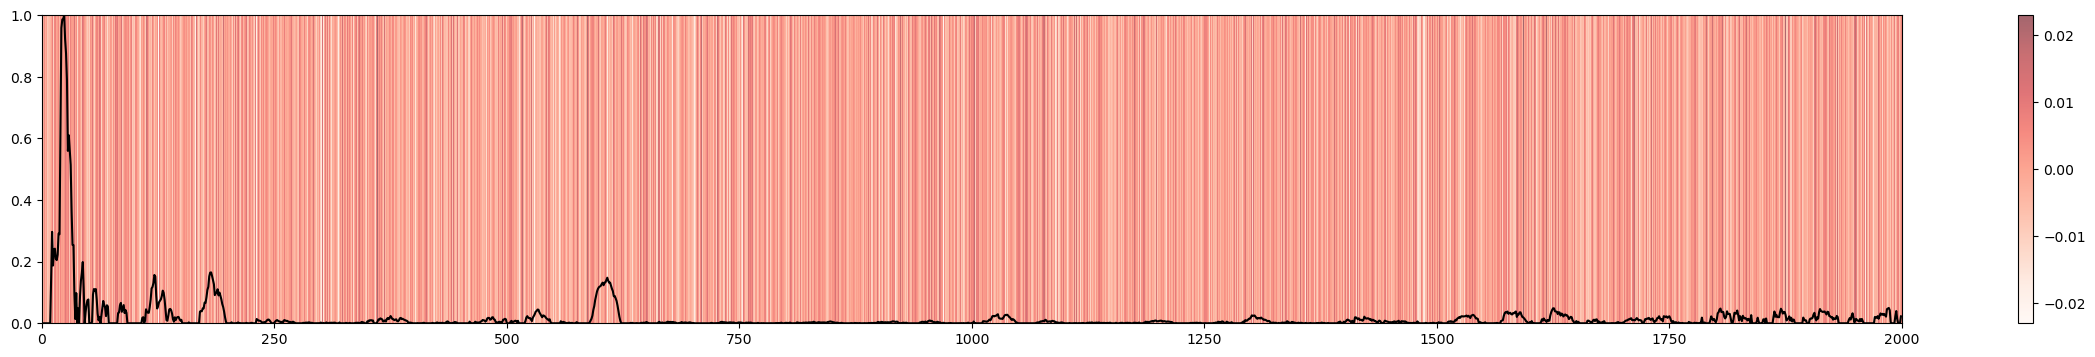

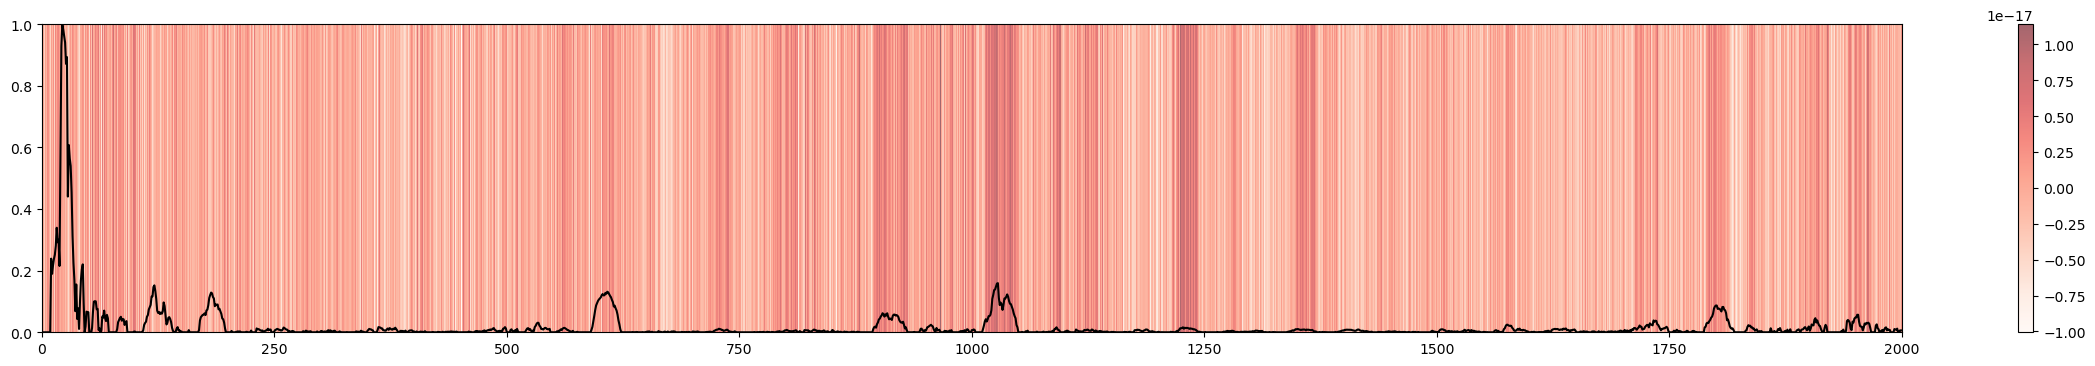

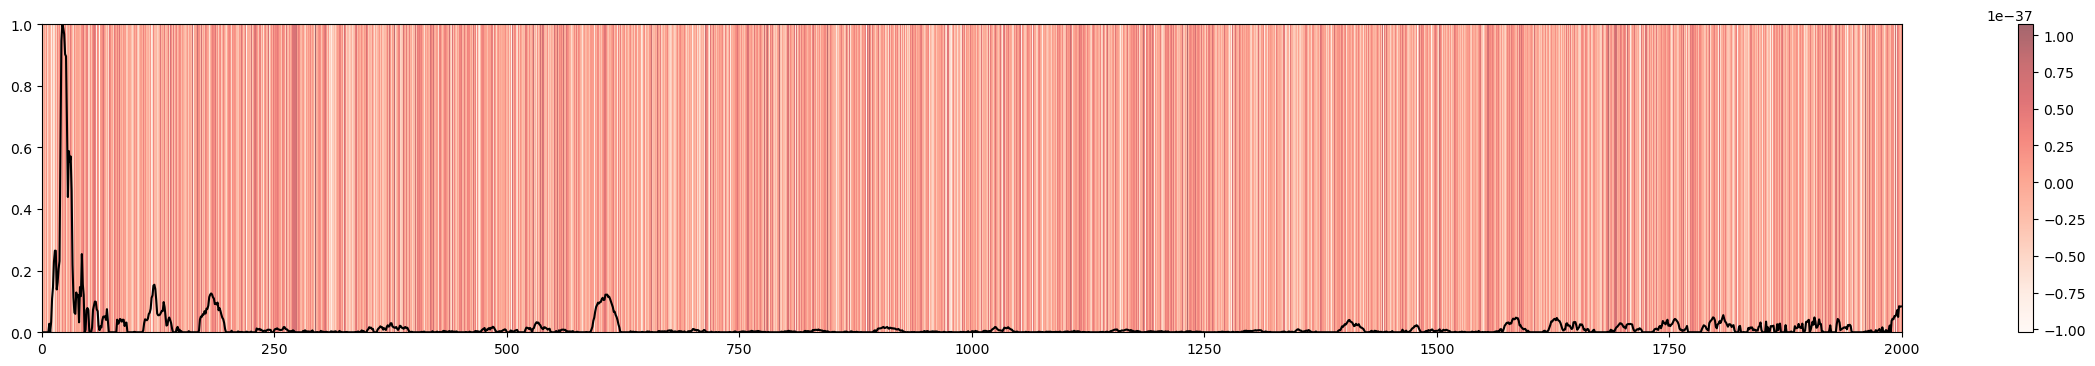

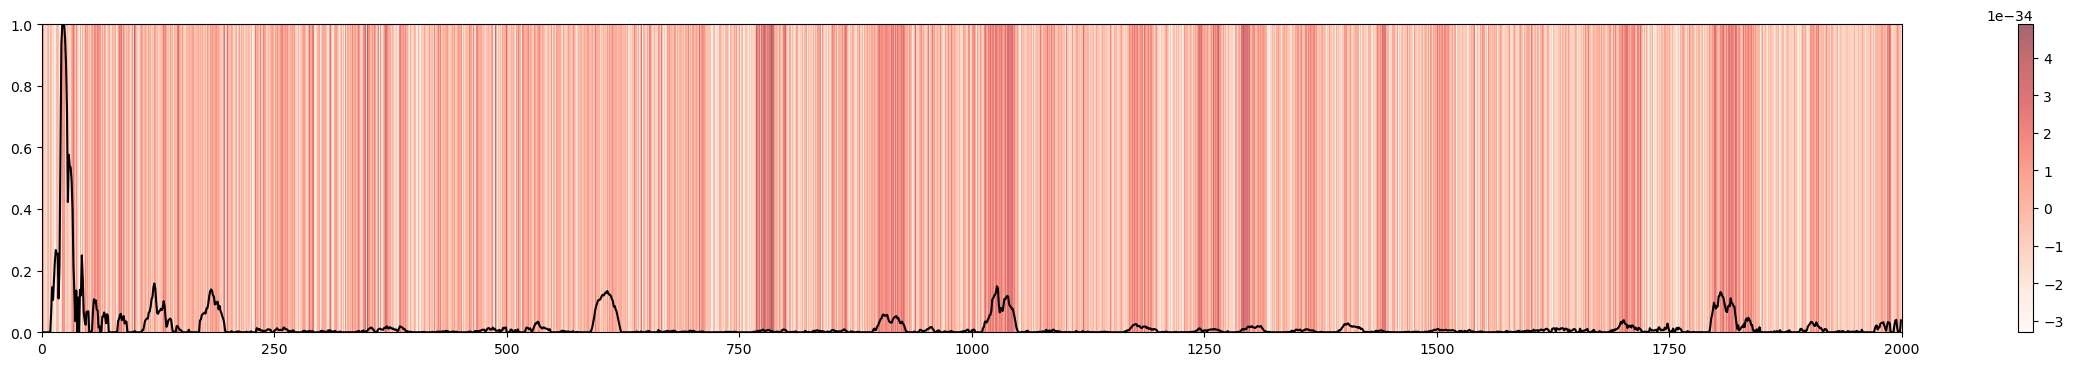

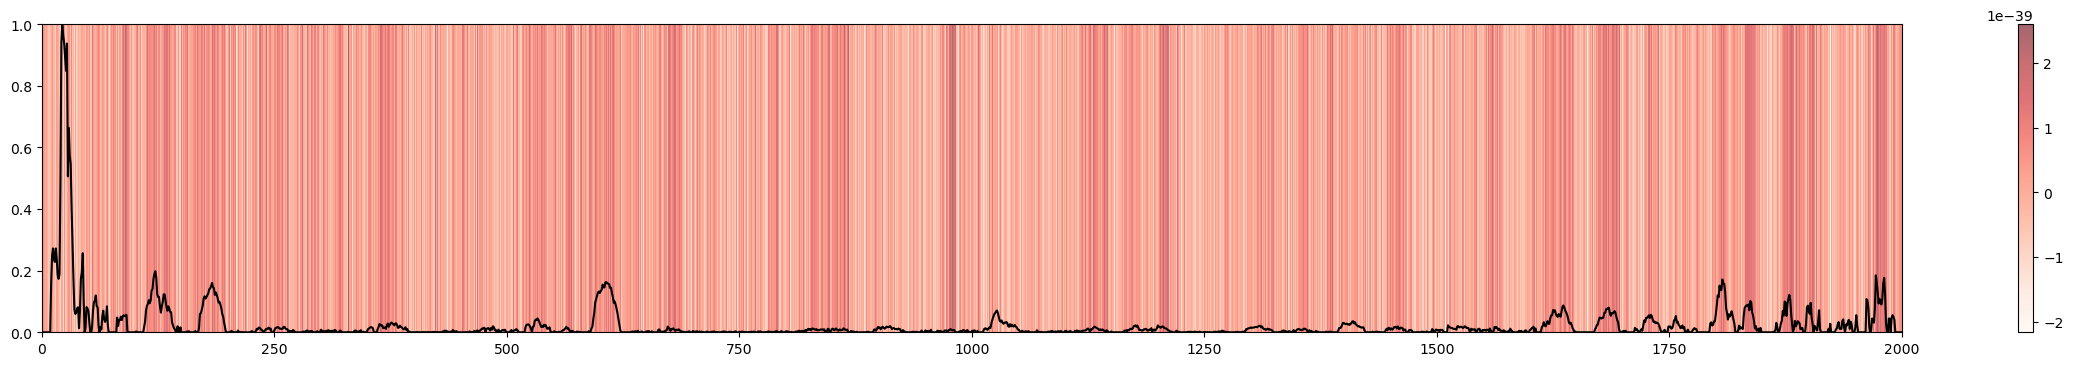

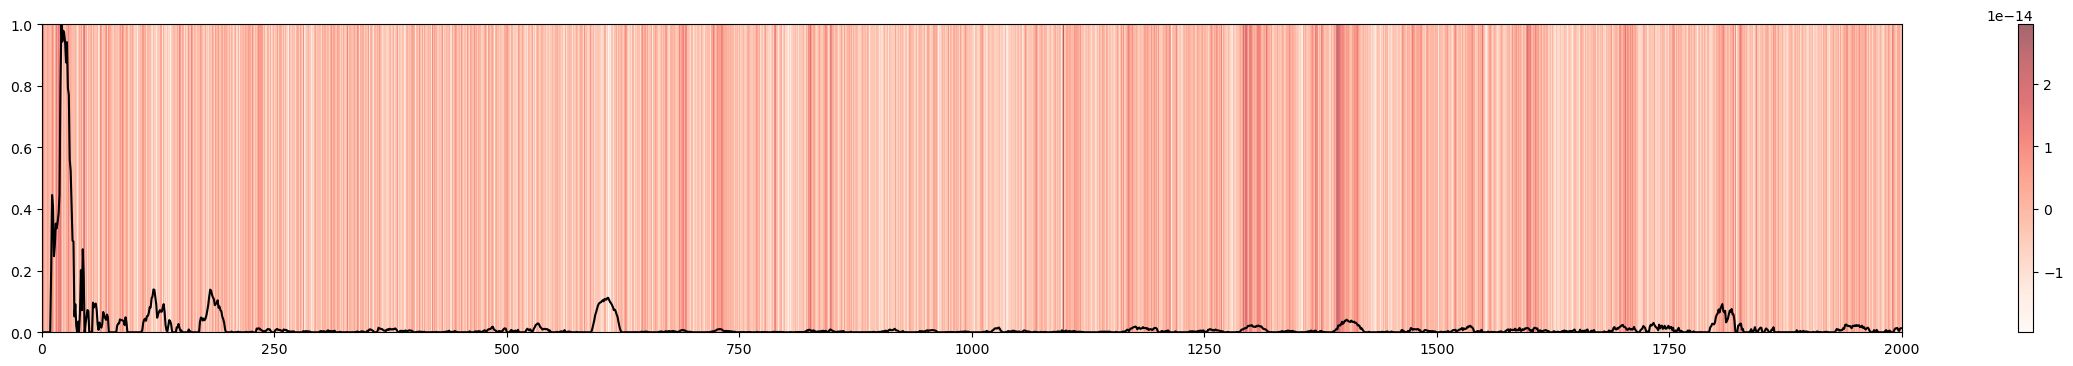

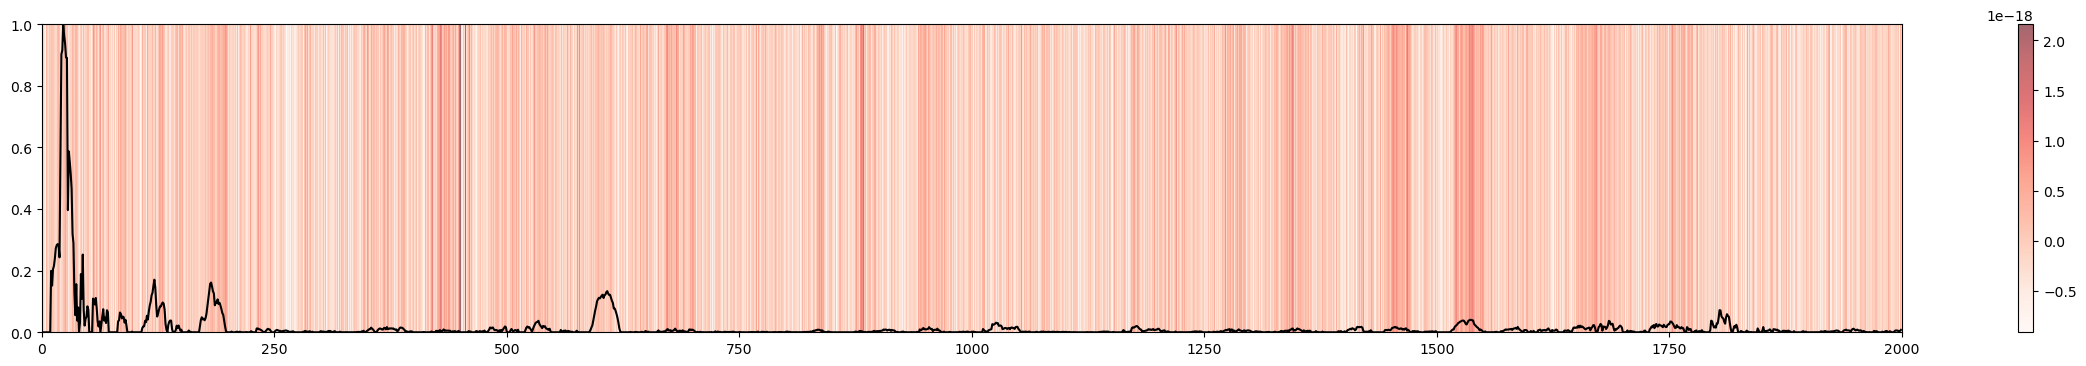

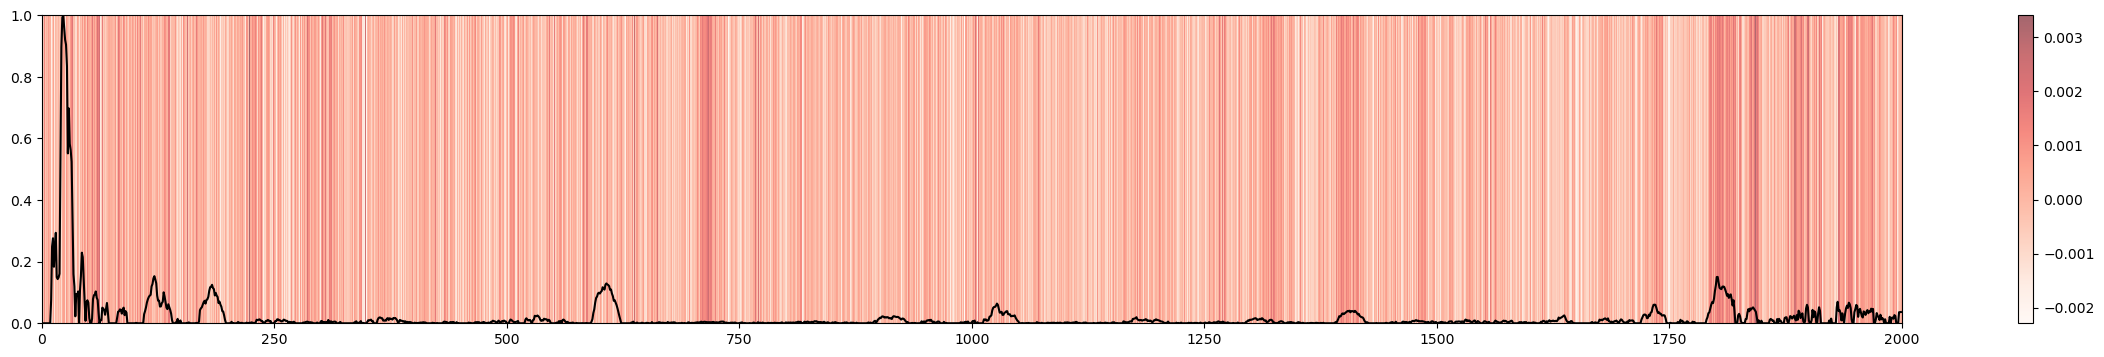

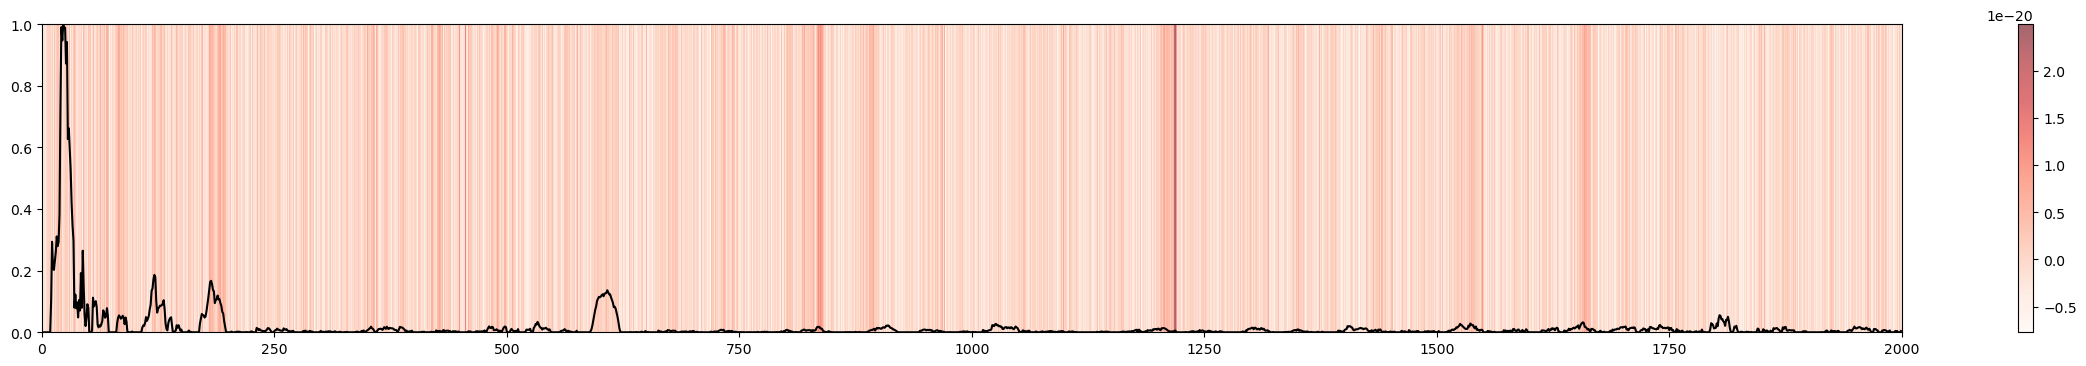

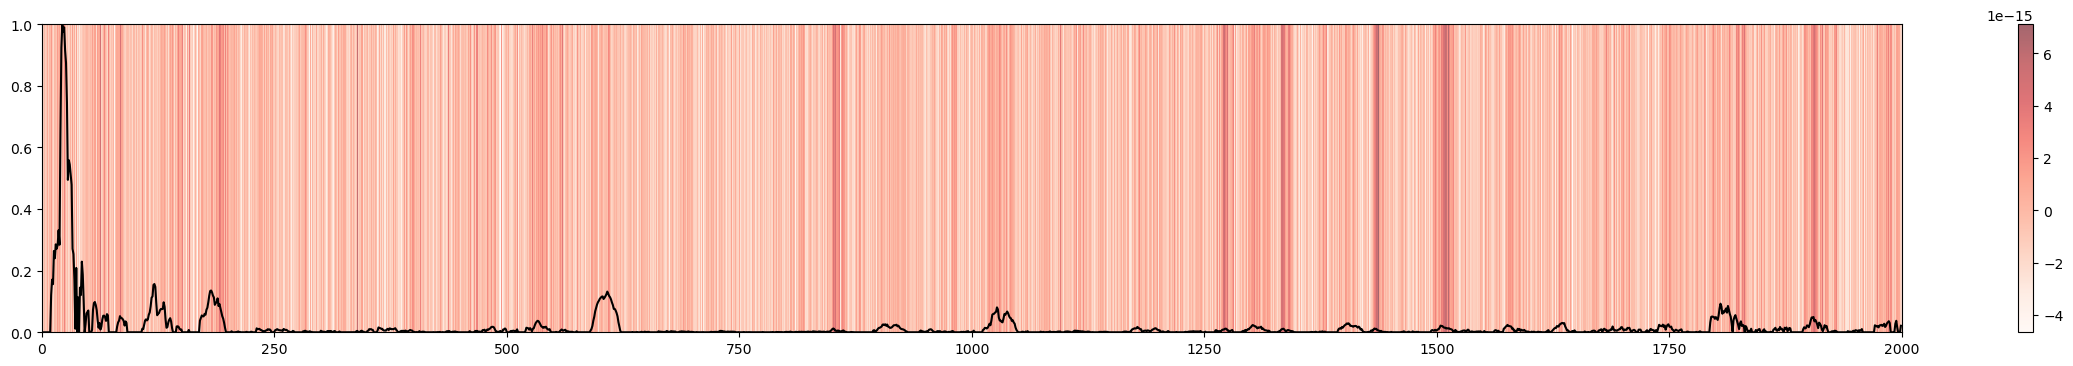

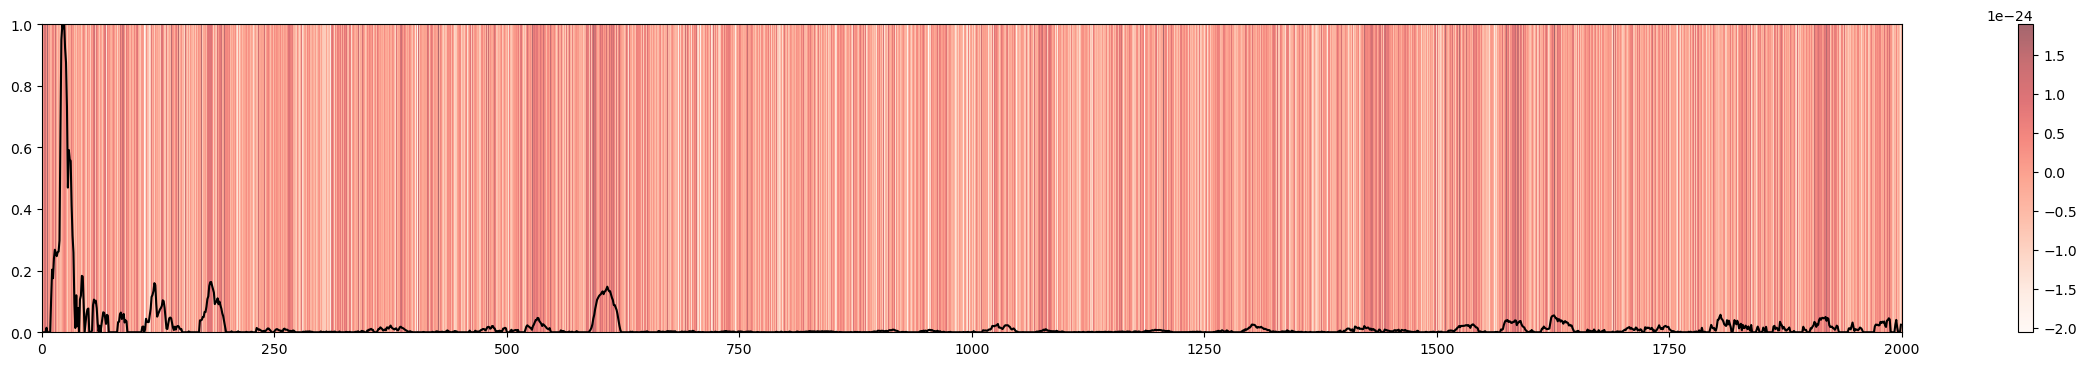

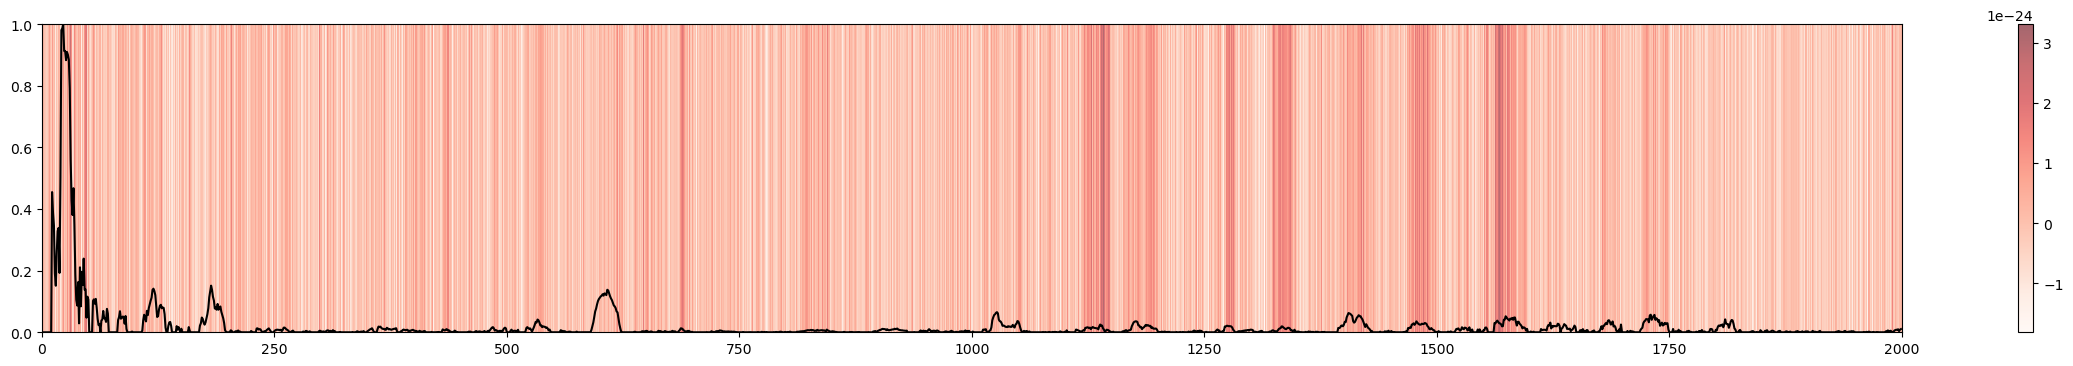

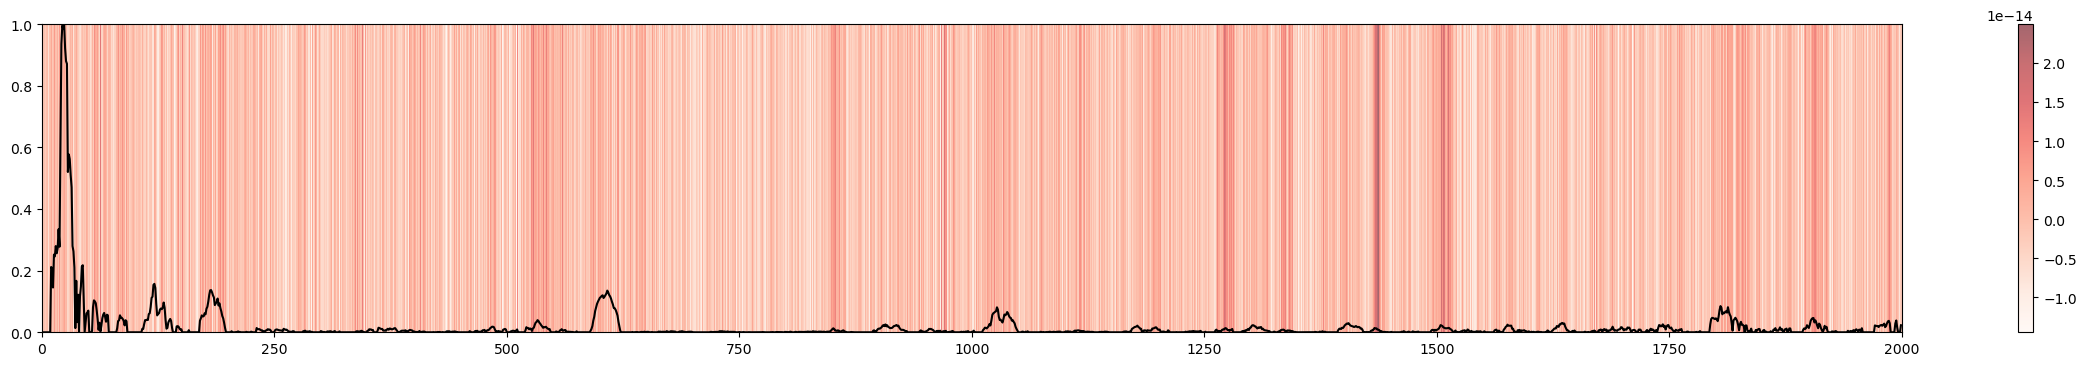

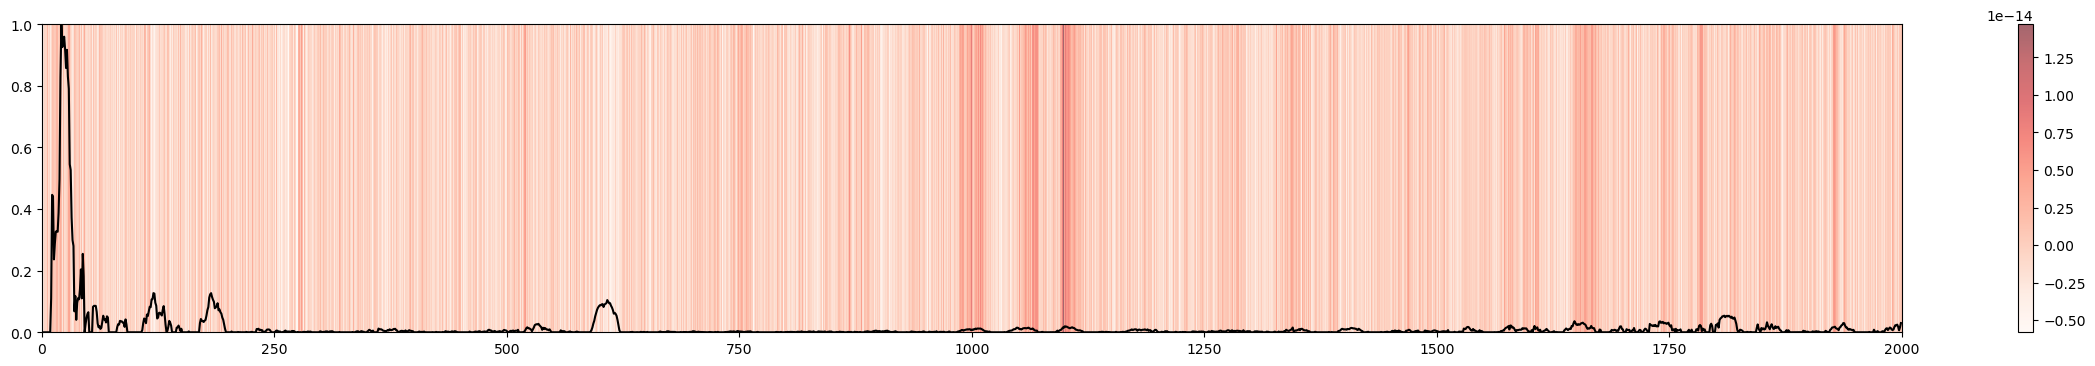

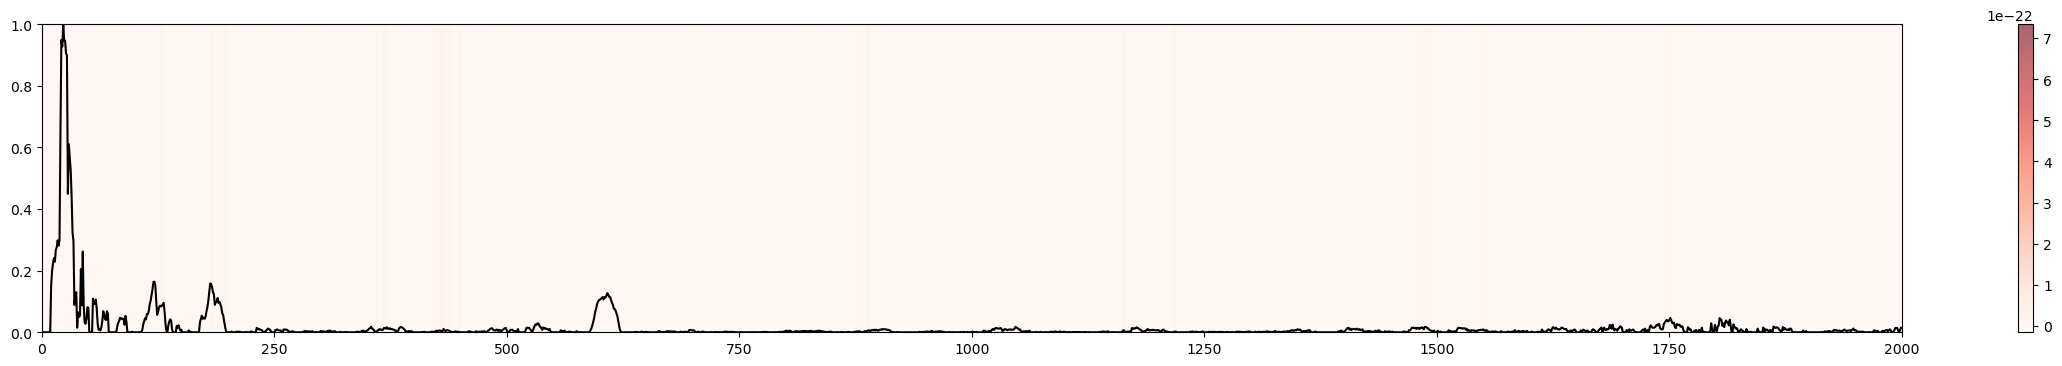

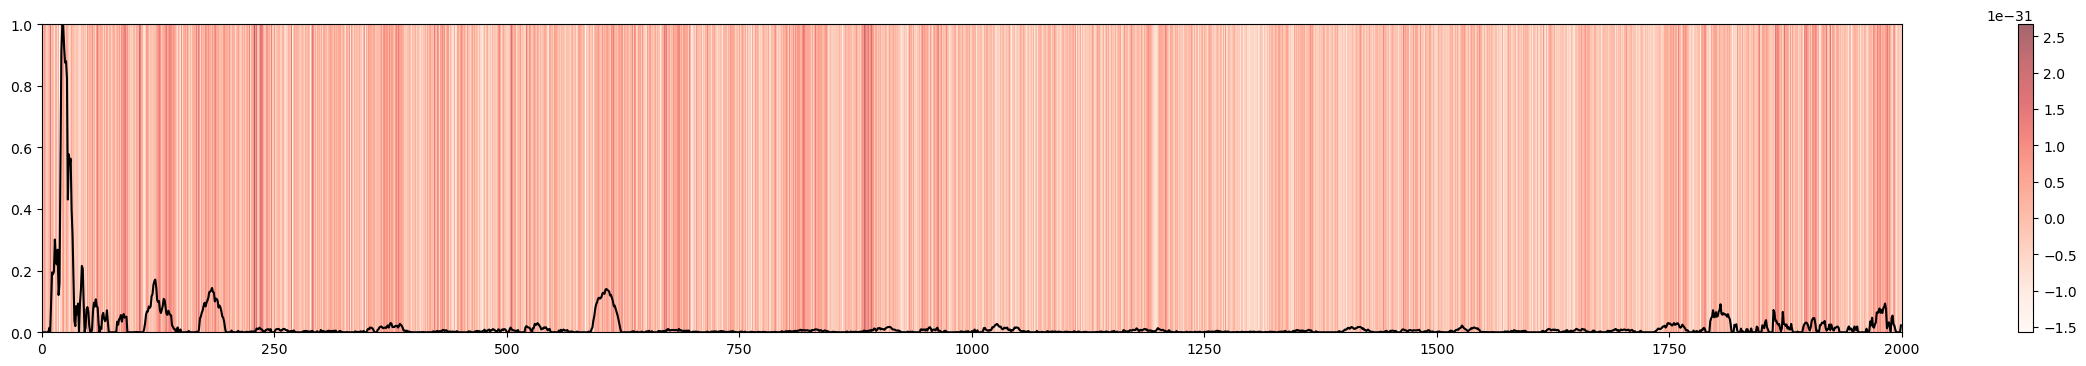

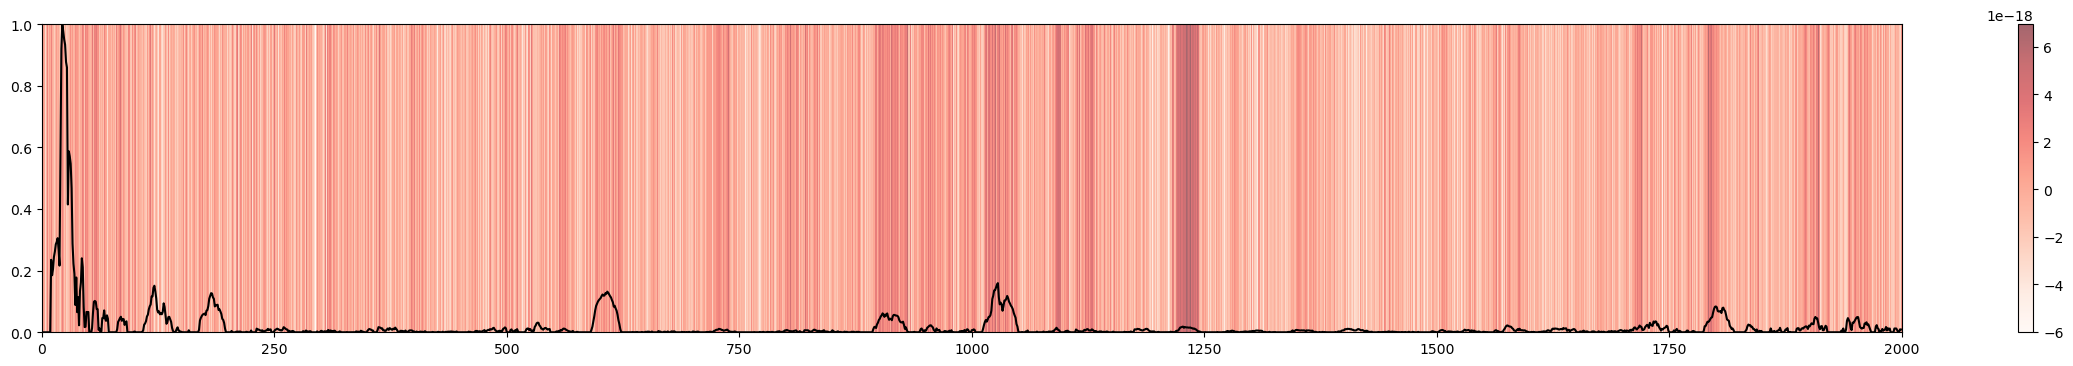

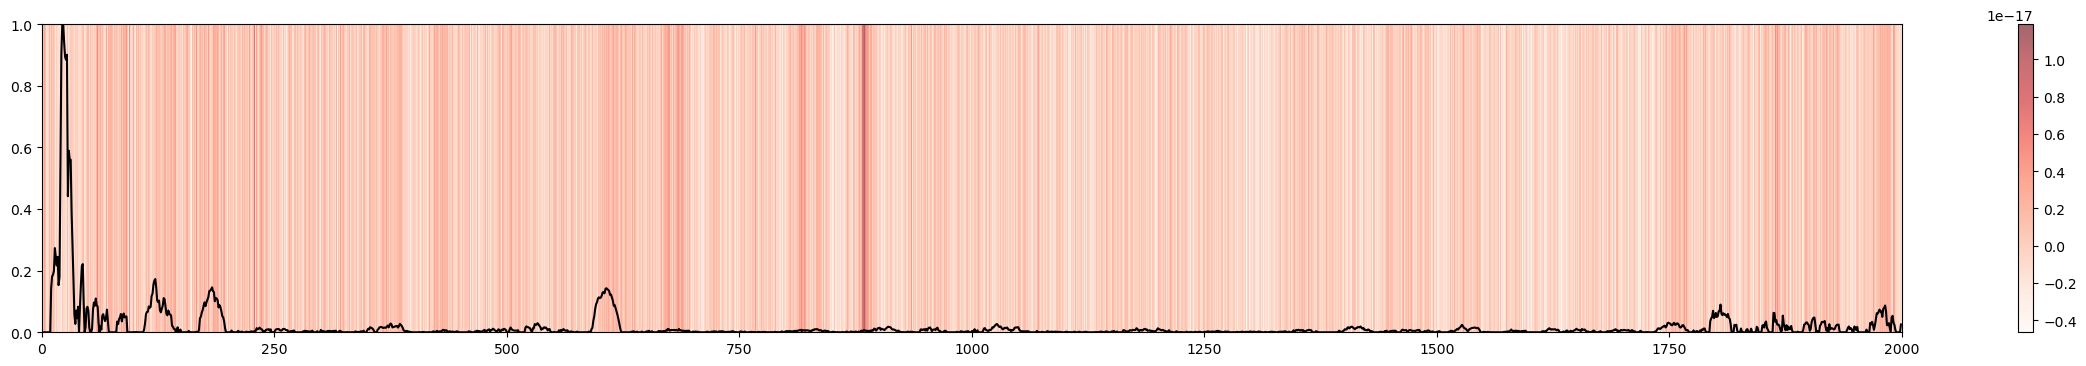

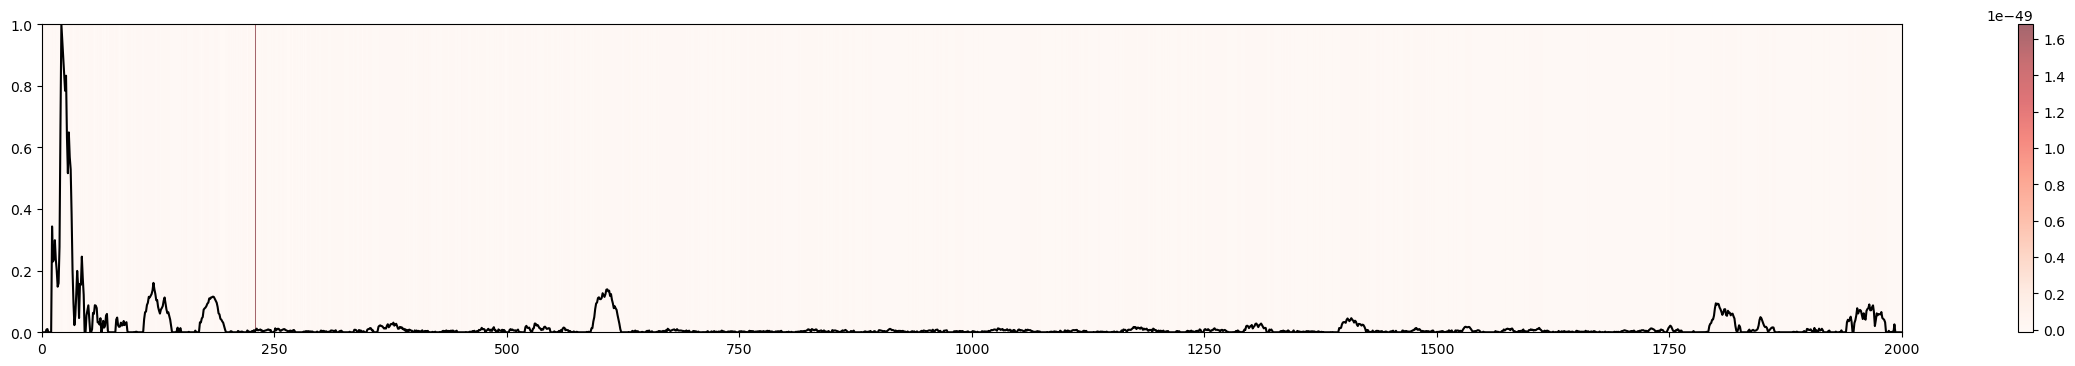

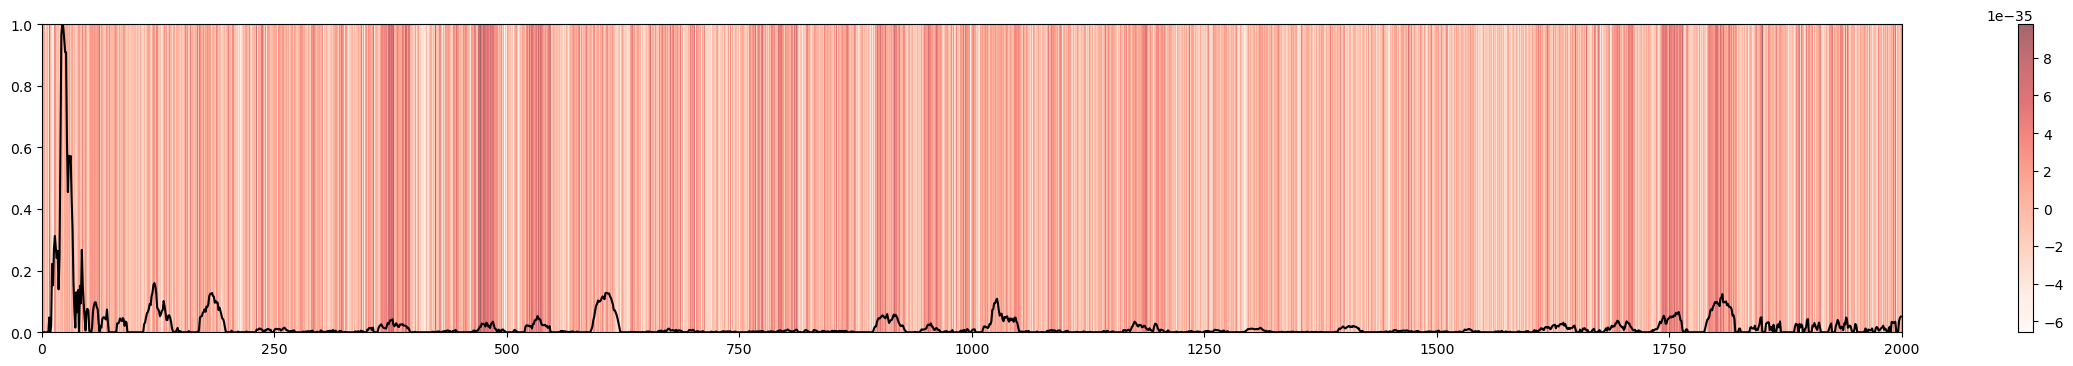

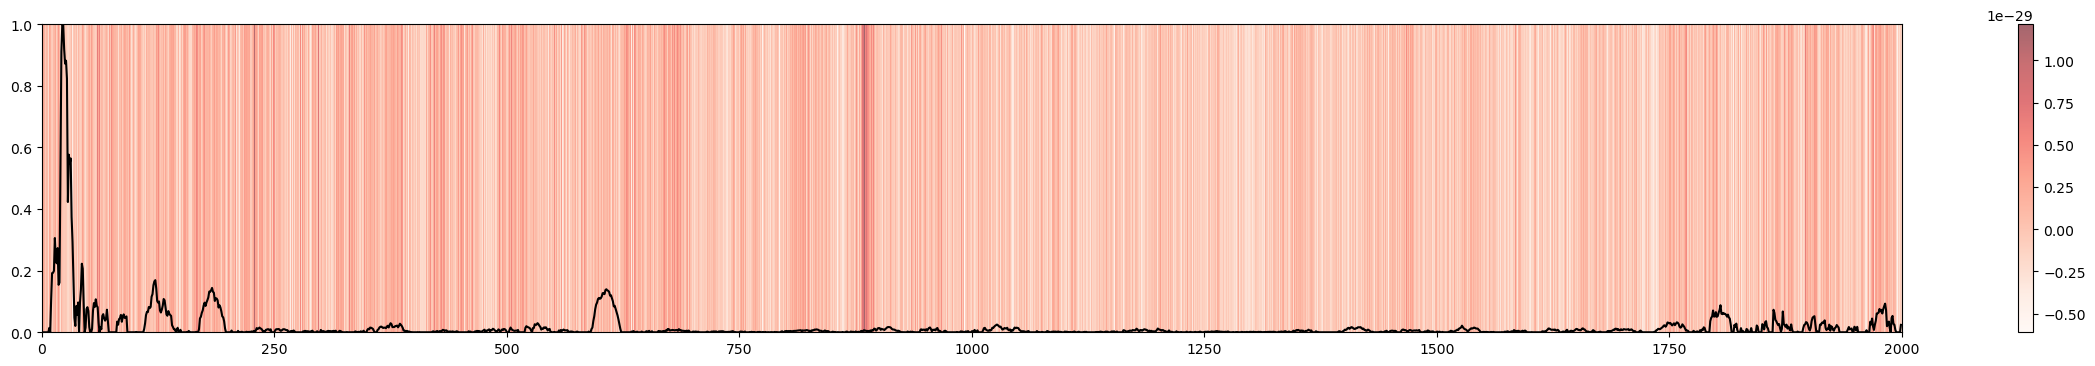

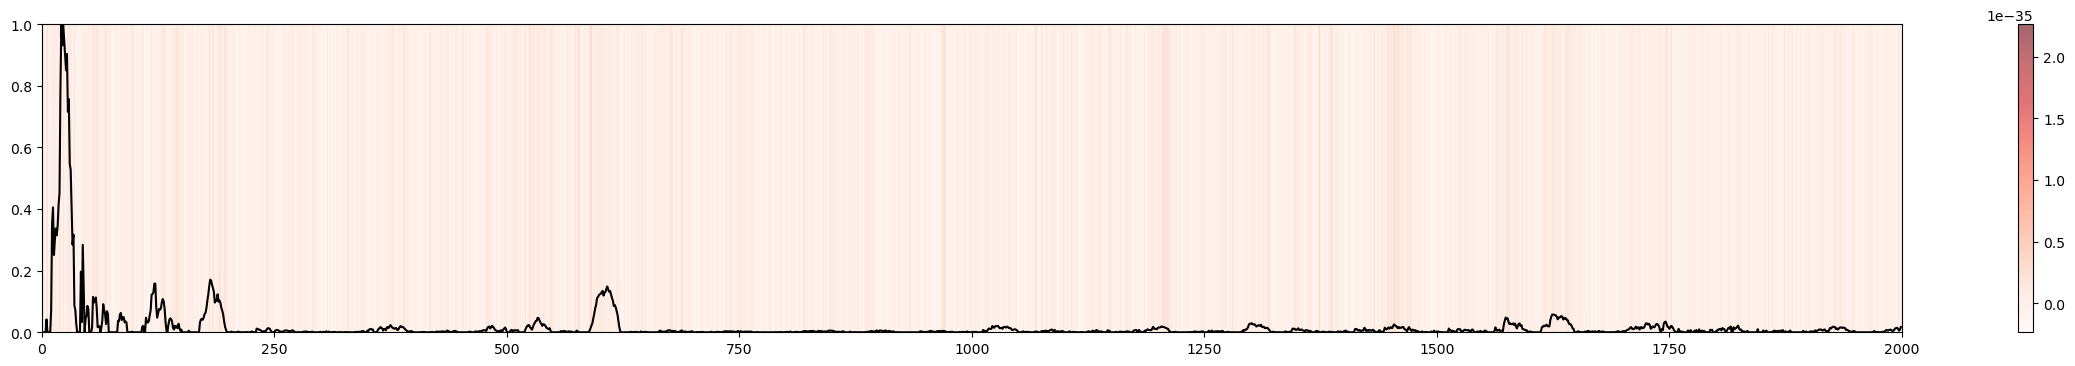

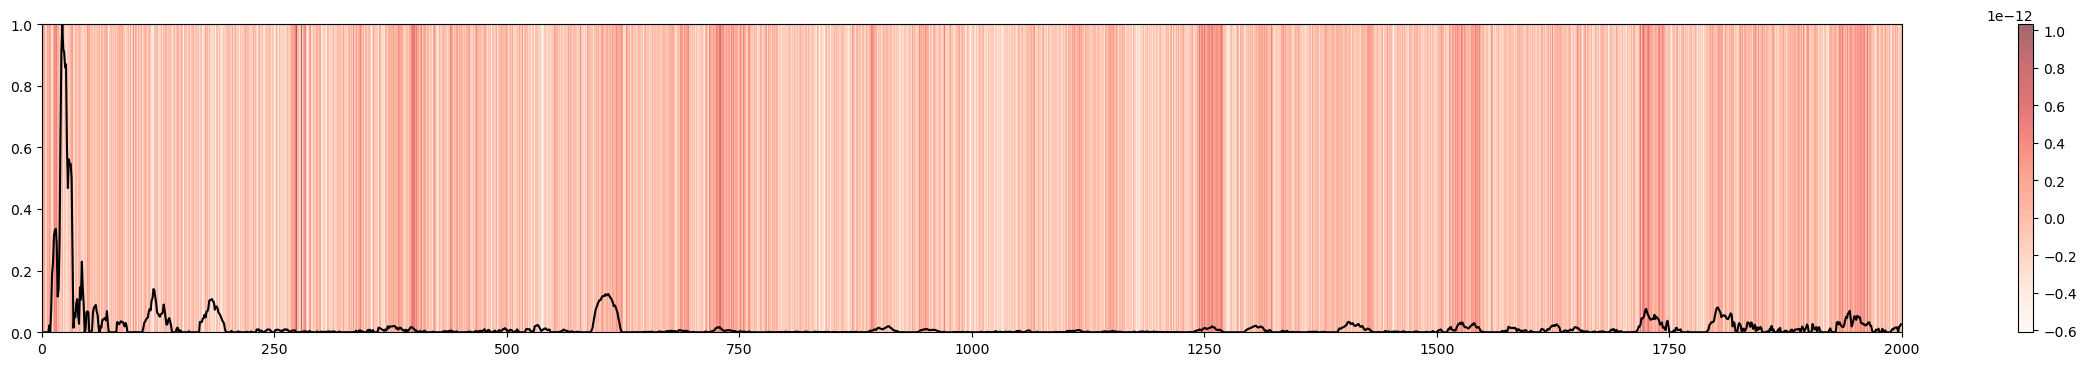

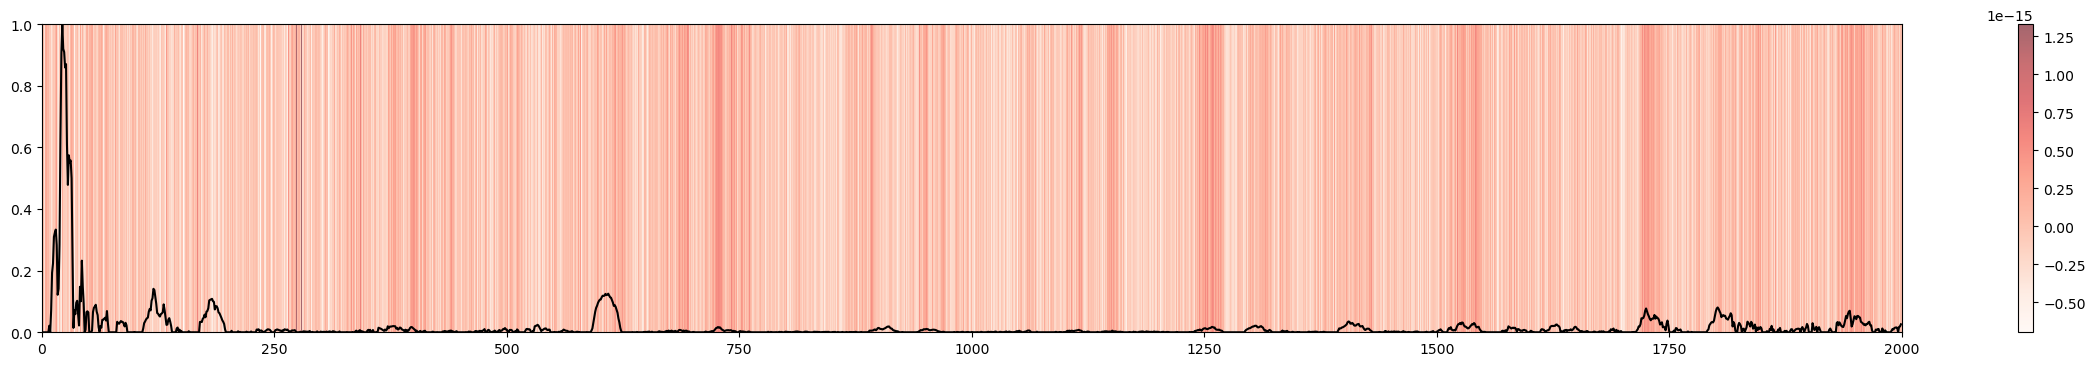

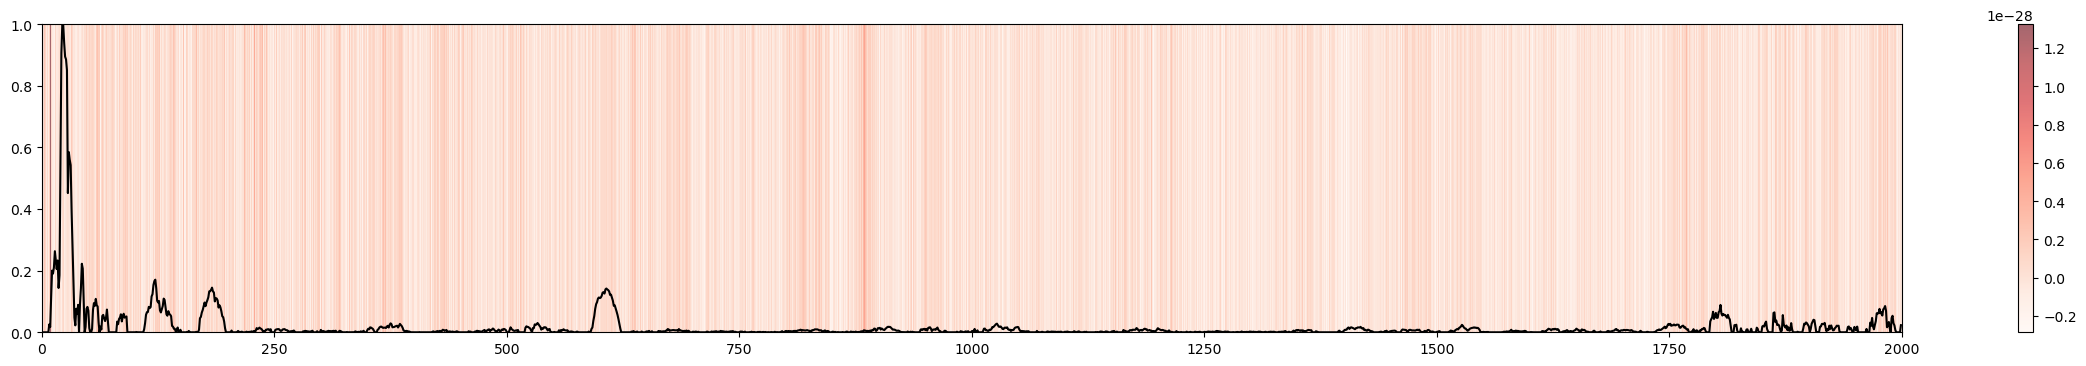

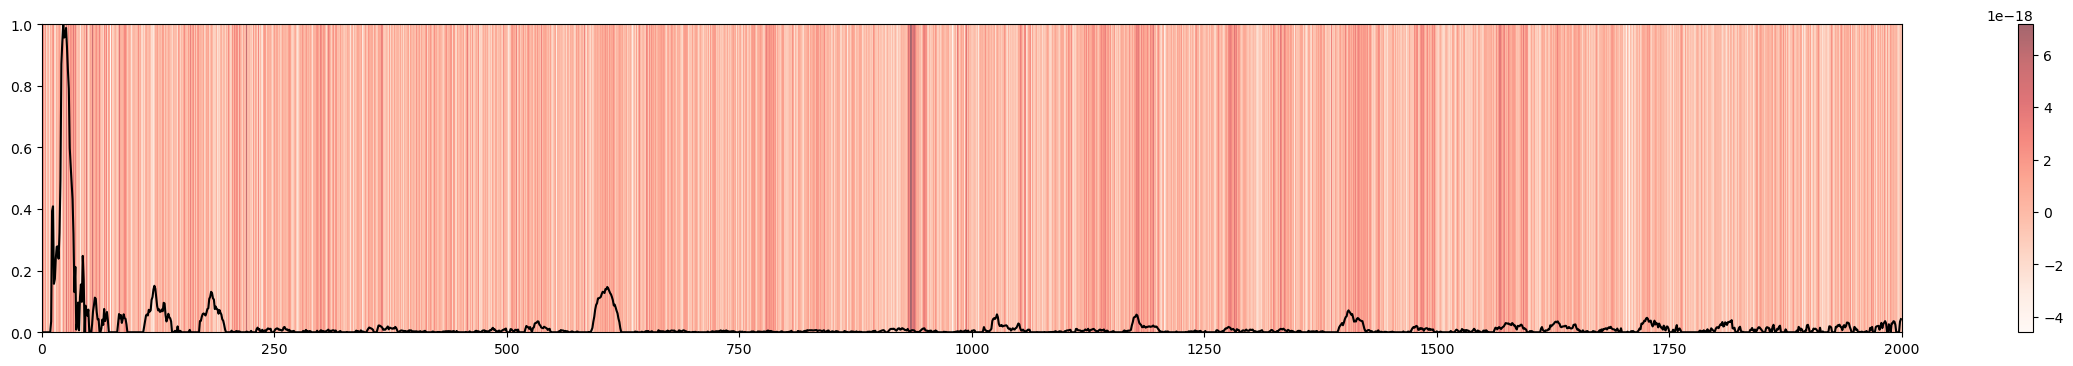

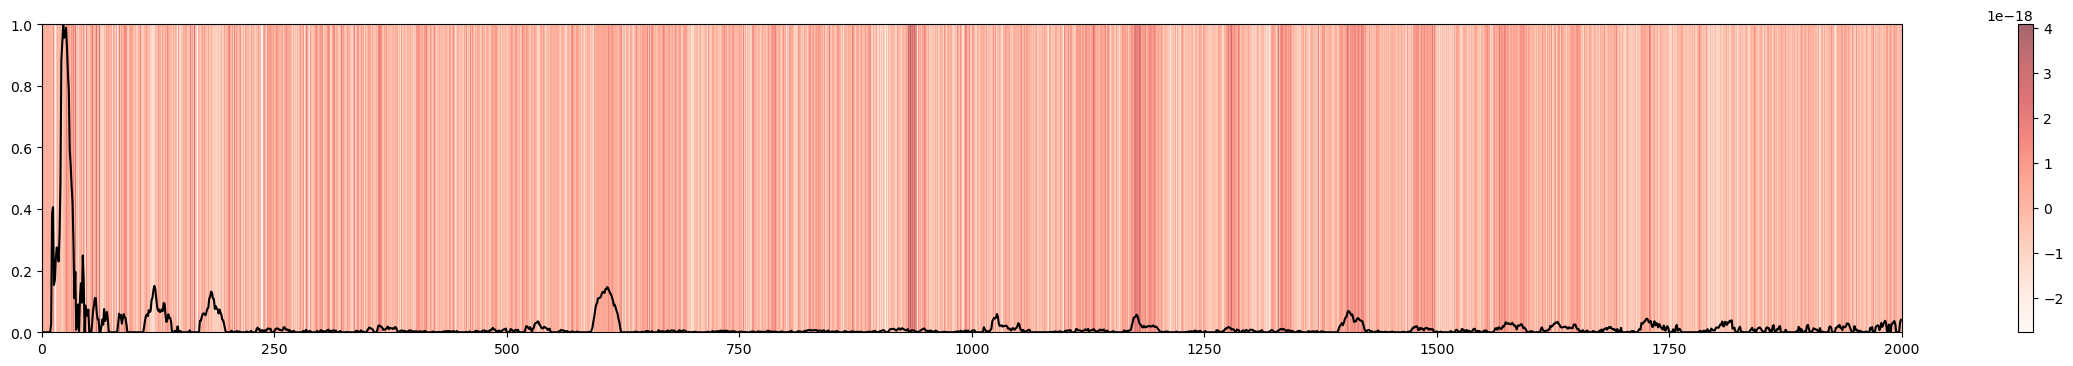

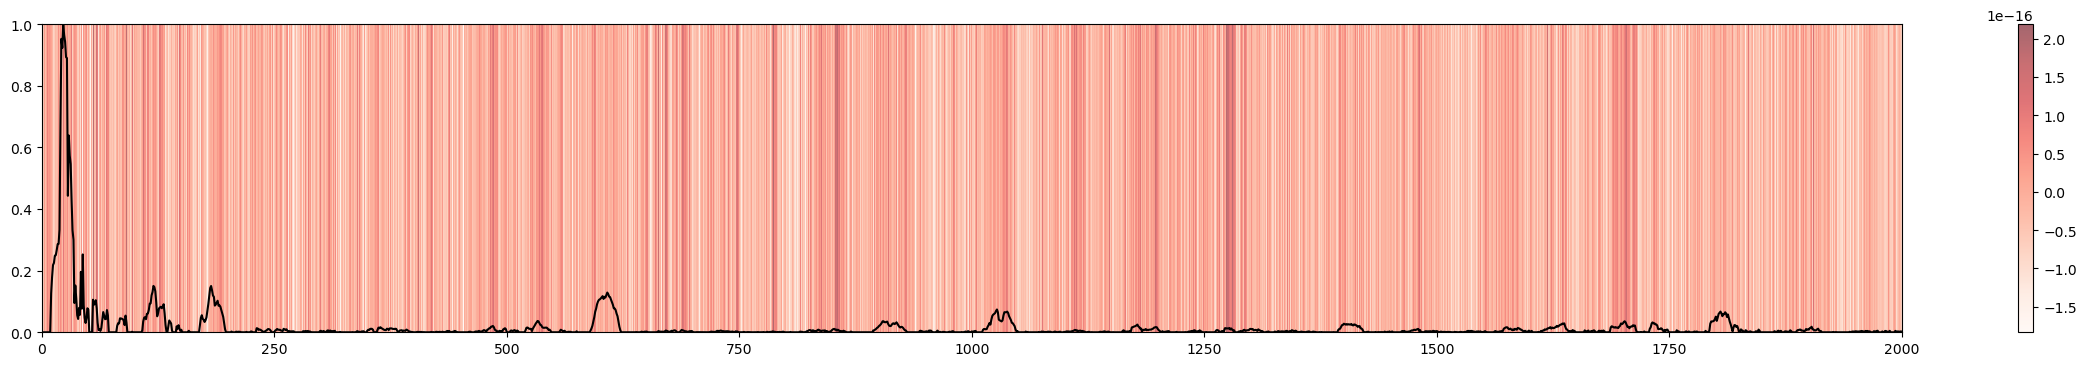

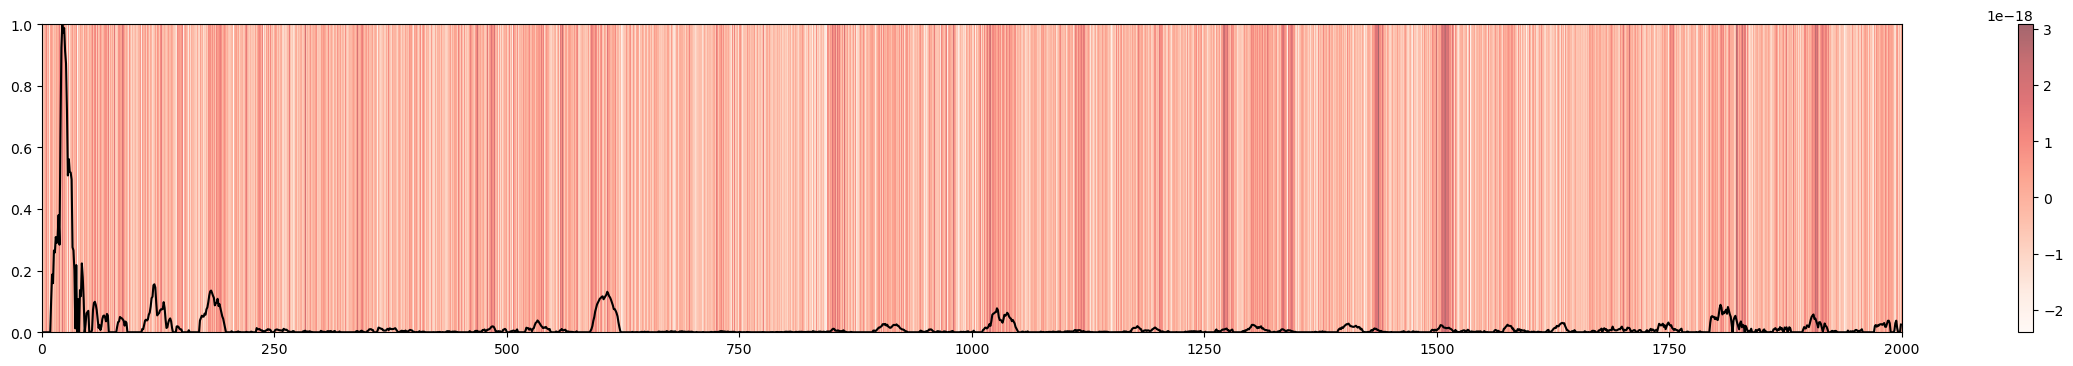

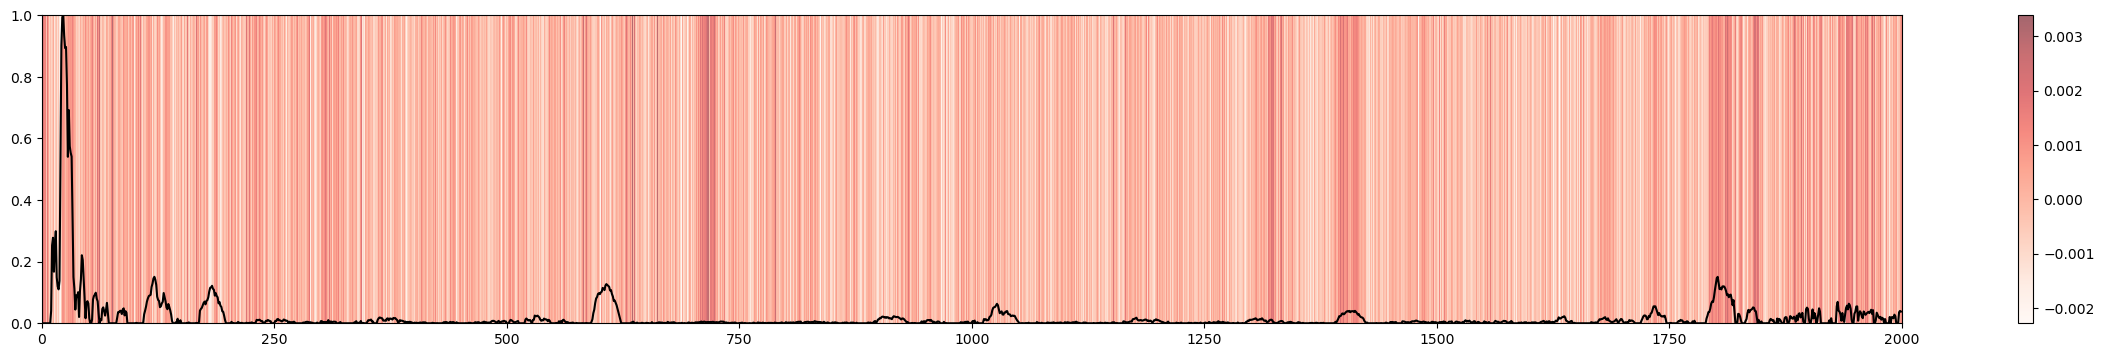

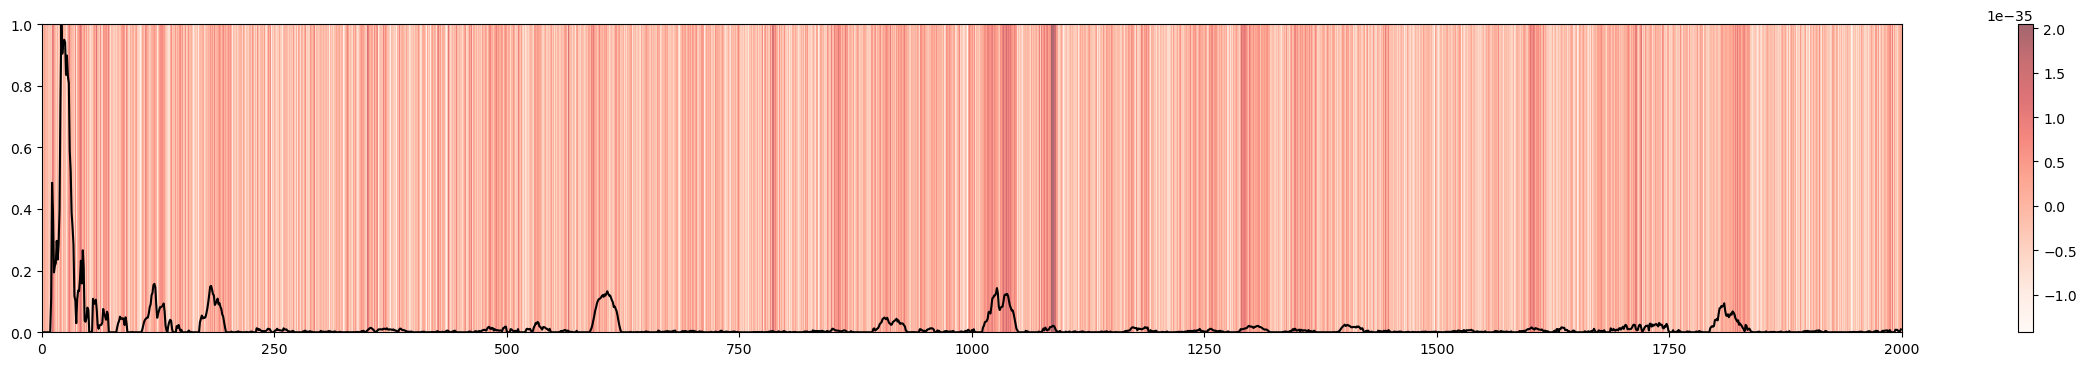

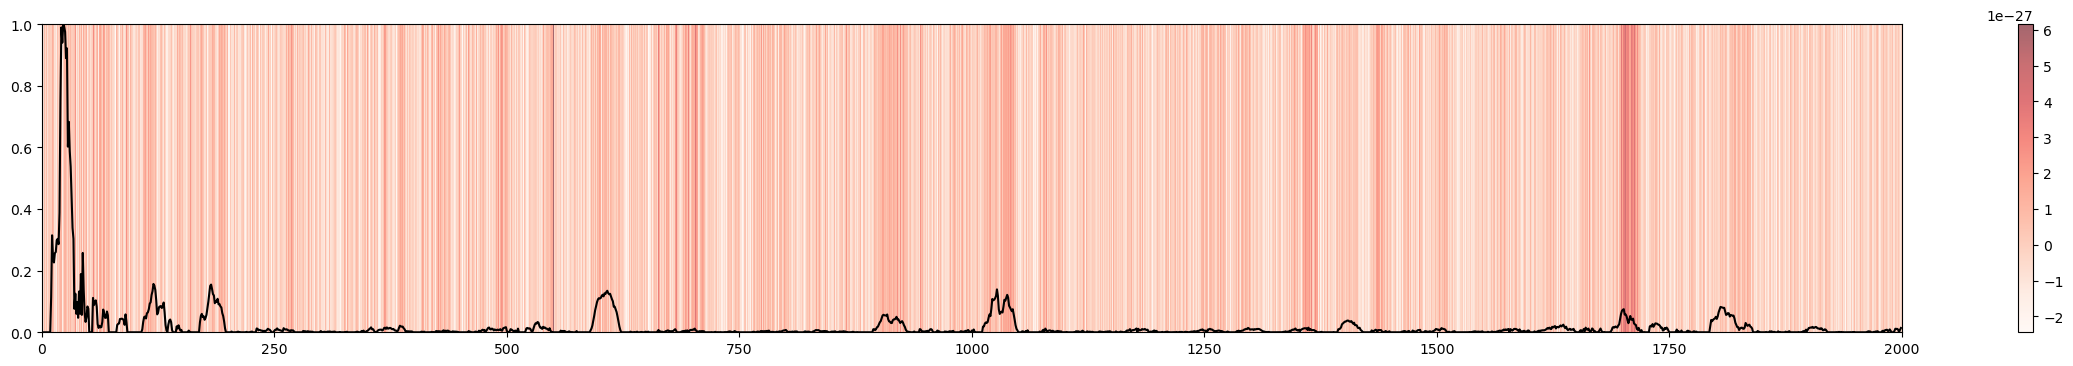

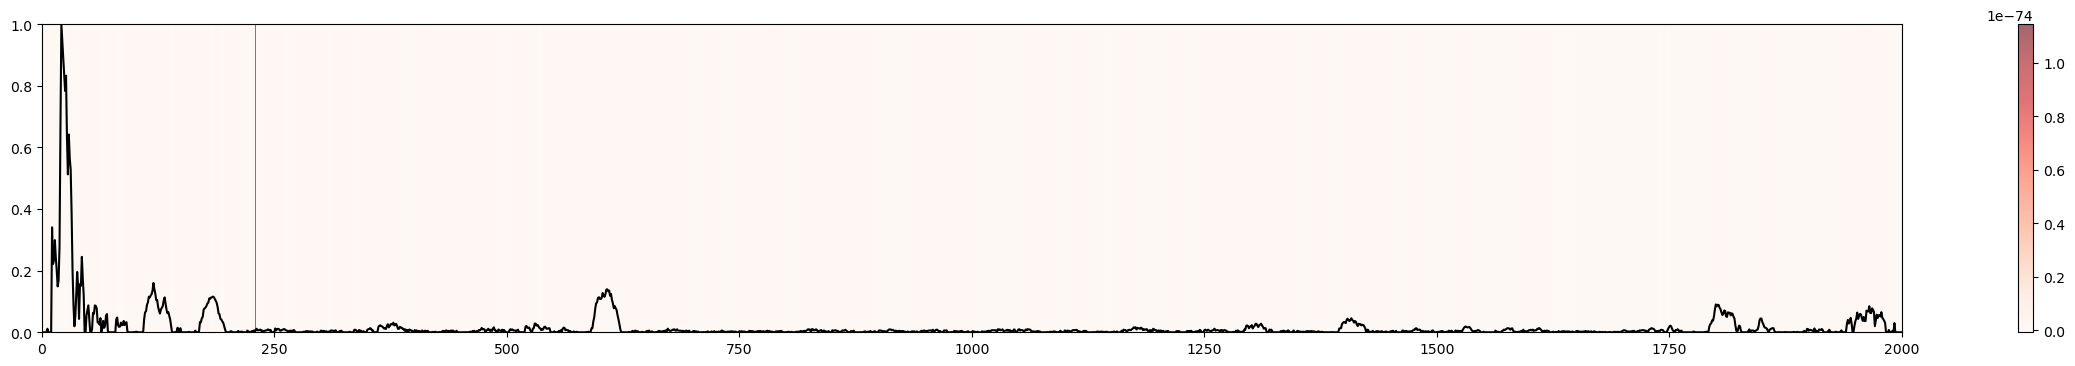

KeyboardInterrupt: 

In [15]:
cnt=0
f=0
i=0
for j in test:
    exp = explainer.explain_instance(j,compute,top_labels=16,num_features=2000,num_samples=1000)
    explanations = exp.as_map()
    heatmap = np.zeros([1,2000])
    l=label_test[i]
    heatmaps = explanations[l]
    heatmaps.sort(key = lambda x: x[0])
    out=np.asarray(heatmaps)
    for i in range(2000):
        heatmap[0,i]=out[i,1]
        
    plt.figure(figsize=(30,4))
    plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto", interpolation='nearest',
                   extent=[0,2000,j.min(),j.max()], alpha=0.6)
    plt.plot(j[0],'k',label="V_d")        
    plt.colorbar()
    plt.show()
    cnt +=1
    i+=1

In [4]:
print(model)

googlenet_1D(
  (activation): CReLU()
  (prelayer): Sequential(
    (0): Conv1d(1, 8, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (prelayer2): Sequential(
    (0): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (prelayer3): Sequential(
    (0): Conv1d(32, 8, kernel_size=(1,), stride=(1,), bias=False)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (a3): Inception_1d(
    (activation): CReLU()
    (b1): Sequential(
      (0): Conv1d(8, 16, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (b2): Sequential(
      (0): Conv1d(8, 8, kernel_size=(3,), stride=(1,), padding=(1,))
      (